# Different Methods to Update the Cache Data

## 1. Cache-aside

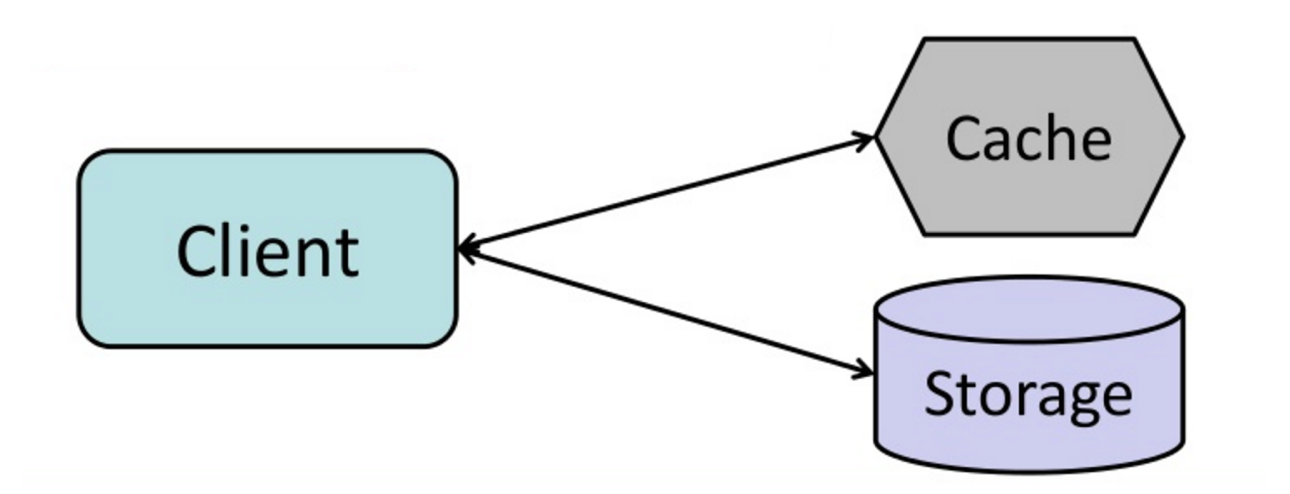

The application is responsible for reading and writing from storage. The cache does not interact with storage directly. The application does the following:

1. Look for an entry in the cache, resulting in a cache miss.
2. Load the entry from the database.
3. Add the entry to the cache.
4. Return the entry.

```python
def get_user(self, user_id):
    user = cache.get("user.{0}".format(user_id))
    if user is None:
        user = db.query("SELECT * FROM users WHERE user_id = {0}".format(user_id))
        if user is not None:
            key = "user.{0}".format(user_id)
            cache.set(key, json.dumps(user))
    return user
```

## 2. Write-through

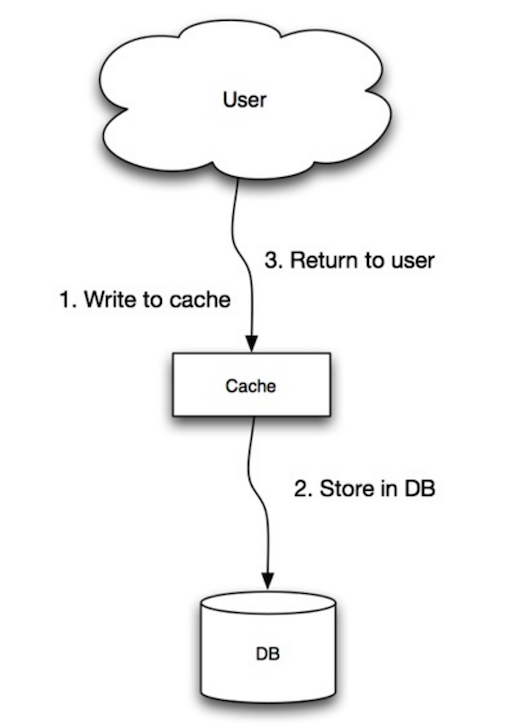

The application uses the cache as the main data store, reading and writing data to it, while the cache is responsible for reading and writing to the database.

1. The application adds/updates an entry in the cache.
2. The cache synchronously writes the entry to the data store.
3. Return.

```python
# Application
set_user(12345, {"foo": "bar"})

# Cache
def set_user(user_id, values):
    user = db.query("UPDATE Users SET values = {0} WHERE id = {1}".format(values, user_id))
    cache.set(user_id, user)
```

## 3. Write-behind

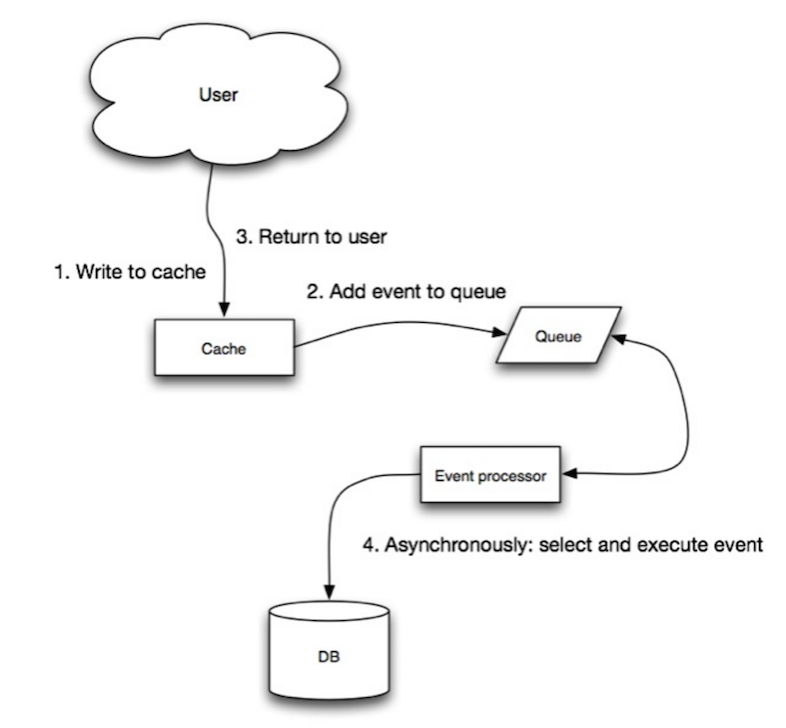

In the write-behind strategy, the application does the following:

- Adds/updates an entry in the cache.
- Asynchronously writes the entry to the data store, improving write performance.

## 4. Refresh-ahead

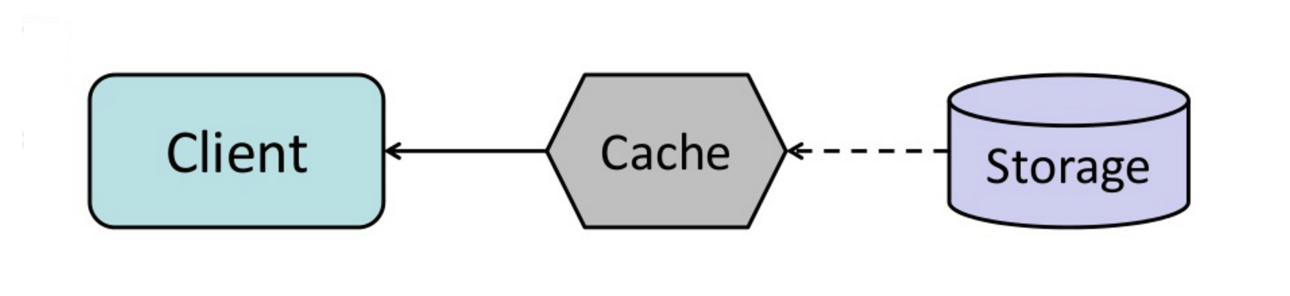

A **Refresh-Ahead Cache** proactively refreshes cached data before it expires. Instead of waiting for a request to trigger data fetching (which may cause delays if the data has expired), the cache preemptively updates itself in the background.

### How it works:
1. A user requests data from the cache.
2. If the data is available and fresh, it is served immediately.
3. If the cache detects that the data is about to expire, it fetches and refreshes it before expiration.
4. This ensures that when the next request comes, fresh data is already in the cache, reducing latency.

---

# Different Types of Caching

## 1. Client Caching

Client-side caching refers to storing frequently accessed data on the client’s device rather than the server. This helps improve application performance by reducing the number of requests sent to the server.

### Example:
- **Web Browser Caching**

### Advantages:
- ✅ Reduces server load.
- ✅ Faster page load times.
- ✅ Reduces network traffic.

### Drawbacks:
- ❌ Potential for stale data if not properly managed.
- ❌ Consumes memory or disk space on the client’s device.

## 2. CDN Caching

Content Delivery Network (CDN) caching is a **distributed network of servers** placed in various locations worldwide. Its main purpose is to serve content to end-users **with high availability and performance** by caching frequently accessed content on nearby servers.

### How it works:
1. A user requests content from a website using a CDN.
2. The CDN checks if the requested content is available in a nearby server's cache.
3. If found, the cached content is served from the nearby server.
4. If not found, the content is retrieved from the origin server, then cached for future requests.

### Benefits:
- ✅ Reduces the distance data needs to travel.
- ✅ Decreases the load on the origin server.
- ✅ Enables faster content delivery.

## 3. Web Server Caching

A **reverse proxy** can serve both **static and dynamic content** directly, reducing the need for requests to reach the **application or database layer**.

## 4. Database Caching

Most databases include **built-in caching mechanisms** in their default configuration. However, optimizing these settings for **specific use cases** can significantly boost performance.

## 5. Application Caching

In-memory caches such as **Memcached** and **Redis** act as **key-value stores** between the application and the data storage. Since the data is stored **in RAM**, it is much faster than traditional databases that store data on disk.

### Redis Features:
- **Persistence options** (ability to store data beyond memory).
- **Built-in data structures** (e.g., sorted sets, lists).

### Different Caching Levels in Applications:
1. **Row-level caching**.
2. **Query-level caching**.
3. **Fully-formed serializable objects**.
4. **Fully-rendered HTML caching**.

⚠ **Avoid file-based caching** whenever possible, as it complicates **cloning and auto-scaling**.
